# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno #Module for missing values
from IPython.display import Markdown,display,HTML #Visual aids
import tabulate
import warnings
from termcolor import colored
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing the data & analysing the data

In [2]:

# Importing the data and displaying the data.
# Getting the differnce of the count of the wanted target.

#0 is a non Legendary Pokemon
#1 is a legendary Pokemon



df = pd.read_csv('pokemon.csv')
display(df)
df['is_legendary'].value_counts()


abilities  against_bug  against_dark  against_dragon  \
0    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
1    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
2    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
3       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
4       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
..                           ...          ...           ...             ...   
796              ['Beast Boost']         0.25           1.0             0.5   
797              ['Beast Boost']         1.00           1.0             0.5   
798              ['Beast Boost']         2.00           0.5             2.0   
799              ['Prism Armor']         2.00           2.0             1.0   
800               ['Soul-Heart']         0.25           0.5             0.0   

     against_electric  against_fairy  against_fight  against_fire  \
0                 0.5            0.5            0.5           2.0   
1                 0.5            0.5            0.5           2.0   
2                 0.5            0.5            0.5           2.0   
3                 1.0            0.5            1.0           0.5   
4                 1.0            0.5            1.0           0.5   
..                ...            ...            ...           ...   
796               2.0            0.5            1.0           2.0   
797               0.5            0.5            2.0           4.0   
798               0.5            4.0            2.0           0.5   
799               1.0            1.0            0.5           1.0   
800               1.0            0.5            1.0           2.0   

     against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0               2.0            1.0  ...             88.1               1   
1               2.0            1.0  ...             88.1               2   
2               2.0            1.0  ...             88.1               3   
3               1.0            1.0  ...             88.1               4   
4               1.0            1.0  ...             88.1               5   
..              ...            ...  ...              ...             ...   
796             0.5            1.0  ...              NaN             797   
797             1.0            1.0  ...              NaN             798   
798             1.0            0.5  ...              NaN             799   
799             1.0            2.0  ...              NaN             800   
800             0.5            1.0  ...              NaN             801   

     sp_attack  sp_defense  speed    type1   type2  weight_kg  generation  \
0           65          65     45    grass  poison        6.9           1   
1           80          80     60    grass  poison       13.0           1   
2          122         120     80    grass  poison      100.0           1   
3           60          50     65     fire     NaN        8.5           1   
4           80          65     80     fire     NaN       19.0           1   
..         ...         ...    ...      ...     ...        ...         ...   
796        107         101     61    steel  flying      999.9           7   
797         59          31    109    grass   steel        0.1           7   
798         97          53     43     dark  dragon      888.0           7   
799        127          89     79  psychic     NaN      230.0           7   
800        130         115     65    steel   fairy       80.5           7   

     is_legendary  
0               0  
1               0  
2               0  
3               0  
4               0  
..            ...  
796             1  
797             1  
798             1  
799             1  
800             1  

[801 rows x 41 columns]

0    731
1     70
Name: is_legendary, dtype: int64

# Viewing the dataset on a max scale for a better understanding

In [3]:
print(df.columns.tolist()) #Presenting all the columns in the dataset in easier way to study read them.
pd.set_option('display.max_columns', None) #Presenting the data on a full scale of columns
pd.set_option('display.max_rows', None)
df.sample(5)

['abilities', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'classfication', 'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name', 'name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary']


abilities  against_bug  against_dark  \
792                         ['Beast Boost']          0.5           1.0   
595    ['Compoundeyes', 'Unnerve', 'Swarm']          1.0           1.0   
240  ['Thick Fat', 'Scrappy', 'Sap Sipper']          1.0           1.0   
39   ['Cute Charm', 'Competitive', 'Frisk']          0.5           0.5   
32    ['Poison Point', 'Rivalry', 'Hustle']          0.5           1.0   

     against_dragon  against_electric  against_fairy  against_fight  \
792             1.0               1.0            0.5            1.0   
595             1.0               0.5            1.0            0.5   
240             1.0               1.0            1.0            2.0   
39              0.0               1.0            1.0            1.0   
32              1.0               1.0            0.5            0.5   

     against_fire  against_flying  against_ghost  against_grass  \
792           0.5             0.5            1.0            1.0   
595           2.0             1.0            1.0            0.5   
240           1.0             1.0            0.0            1.0   
39            1.0             1.0            0.0            1.0   
32            1.0             1.0            1.0            0.5   

     against_ground  against_ice  against_normal  against_poison  \
792             4.0          1.0             0.5            0.25   
595             1.0          1.0             1.0            1.00   
240             1.0          1.0             1.0            1.00   
39              1.0          1.0             1.0            2.00   
32              2.0          1.0             1.0            0.50   

     against_psychic  against_rock  against_steel  against_water  attack  \
792              2.0           1.0            2.0            2.0      53   
595              1.0           2.0            0.5            1.0      77   
240              1.0           1.0            1.0            1.0      80   
39               1.0           1.0            2.0            1.0      70   
32               2.0           1.0            1.0            1.0      72   

     base_egg_steps  base_happiness  base_total capture_rate  \
792           30720               0         570           45   
595            5120              70         472           75   
240            5120              70         490           45   
39             2560              70         435           50   
32             5120              70         365          120   

          classfication  defense  experience_growth  height_m   hp  \
792    Parasite Pokémon       47            1250000       1.2  109   
595   EleSpider Pokémon       60            1000000       0.8   70   
240    Milk Cow Pokémon      105            1250000       1.2   95   
39      Balloon Pokémon       45             800000       1.0  140   
32   Poison Pin Pokémon       57            1059860       0.9   61   

     japanese_name        name  percentage_male  pokedex_number  sp_attack  \
792   Uturoidウツロイド    Nihilego              NaN             793        127   
595   Dentulaデンチュラ  Galvantula             50.0             596         97   
240   Miltankミルタンク     Miltank              0.0             241         40   
39     Pukurinプクリン  Wigglytuff             24.6              40         85   
32   Nidorinoニドリーノ    Nidorino            100.0              33         55   

     sp_defense  speed   type1     type2  weight_kg  generation  is_legendary  
792         131    103    rock    poison       55.5           7             1  
595          60    108     bug  electric       14.3           5             0  
240          70    100  normal       NaN       75.5           2             0  
39           50     45  normal     fairy       12.0           1             0  
32           55     65  poison       NaN       19.5           1             0

# Studying the types of each feature

In [4]:
df.dtypes #Checking the types of the features.

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

# The description of each column

   | | Feature  | Description    |
|---:|:-------------|:-----------|
| 1 |  name | The English name of the Pokemon       | 
| 2 | japanese_name  | The Original Japanese name of the Pokemon    |
| 3 |  pokedex_number | The entry number of the Pokemon in the National Pokedex      |
| 4 |  percentage_male | The percentage of the species that are male. Blank if the Pokemon is genderless       |
| 5 |  type1 | The Primary Type of the Pokemon       |
| 6 |  type2 | The Secondary Type of the Pokemon       |
| 7 |  classification | The Classification of the Pokemon as described by the Sun and Moon Pokedex       |
| 8 |  height_m | Height of the Pokemon in metres       |
| 9 |  weight_kg | The Weight of the Pokemon in kilograms       |
| 10 |  capture_rate | Capture Rate of the Pokemon       |
| 11|  baseeggsteps | The English name of the Pokemon       |
| 12 |  abilities | A stringified list of abilities that the Pokemon is capable of having       |
| 13 |  experience_growth | The Experience Growth of the Pokemon       |
| 14 |  base_happiness | Base Happiness of the Pokemon       |
| 15 |  base_total | Base total of Pokemon     |
| 16 |  against_? | Eighteen features that denote the amount of damage taken against an attack of a particular type       |
| 17 |  hp | The Base HP of the Pokemon       |
| 18 |  attack | The Base Attack of the Pokemon       |
| 19 |  defense | The Base Defense of the Pokemon       |
| 20 |  sp_attack | The Base Special Attack of the Pokemon       |
| 21 |  sp_defense | The Base Special Defense of the Pokemon      |
| 22 |  speed | The Base Speed of the Pokemon       |
| 23 |  generation | The numbered generation which the Pokemon was first introduced       |
| 24 |  is_legendary | Denotes if the Pokemon is legendary       |

In [5]:
corrmat = df.corr()
top_corr_features = corrmat.index

df[top_corr_features].shape[0]

801

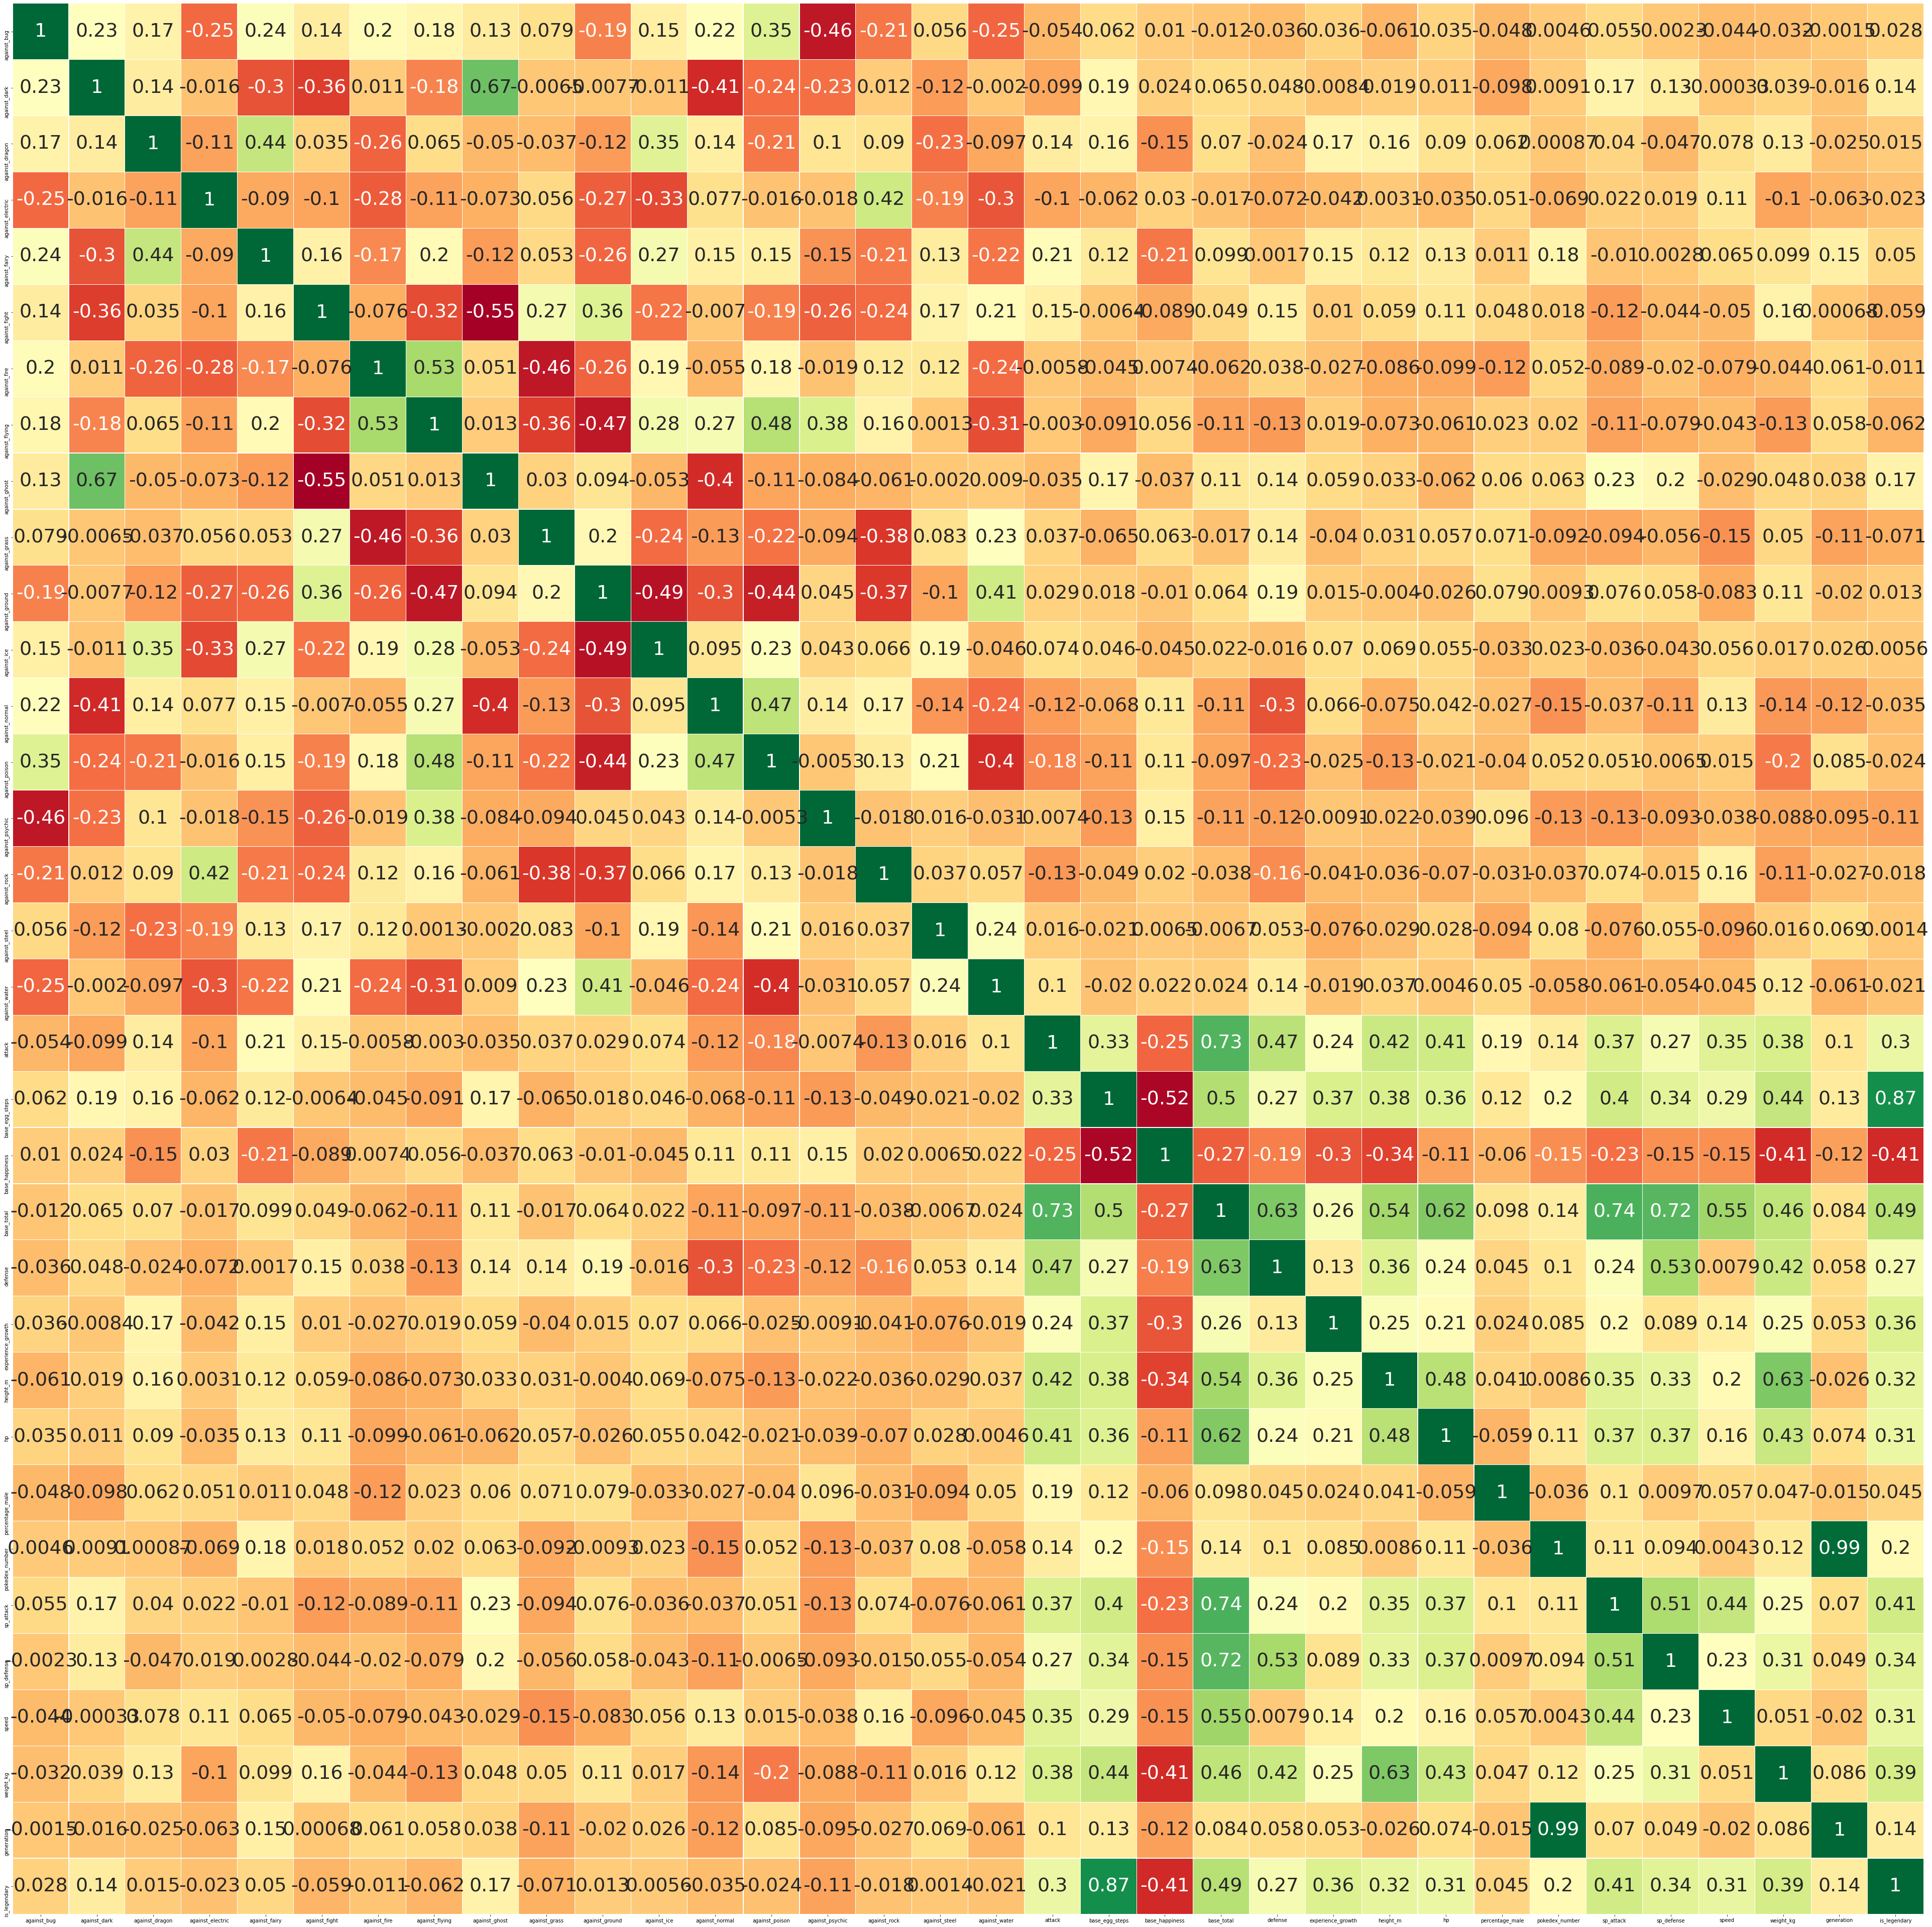

In [73]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(70,70))
#plot heat map

g=sns.heatmap(df[top_corr_features].corr(),linewidths=0.1,annot=True,cmap="RdYlGn", annot_kws={"fontsize":38}, square=True,cbar=False)
# g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 35)
# g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 35)
g

# Creating a variable of the target for visual puproses

In [7]:
#"Reverse Encoding" of the category values for just presentation for the graphs.
visual_legendary = df['is_legendary'].replace(to_replace = [0 , 1] , value = ["Non Legendary", "Legendary"])

# Visualization of the count of how many legendaries are ine each generation

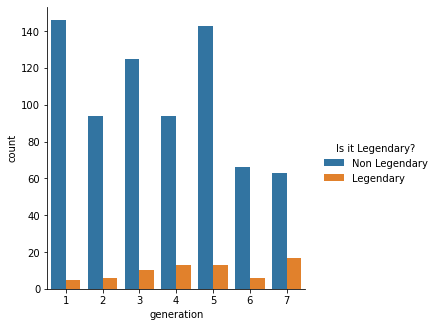

In [8]:
#To understand on how many legendaries they are in each generation

g = sns.catplot(x = 'generation', kind ='count',hue='is_legendary', data = df)
legend = g._legend
legend.set_title("Is it Legendary?")
for t, l in zip(legend.texts,("Non Legendary", "Legendary")):
    t.set_text(l)
g.fig.subplots_adjust(top=0.9,right=0.7)
g

#From the graph below we can see that legendary pokemons are far less than the normal ones in each generation.

# Visualization of Capture rate of NonLegendary/Legendary

Error causing when trying to covert values to numeric at index 773: 30 (Meteorite)255 (Core)
Set to 255 to numeric to work around the object to transform it: 255


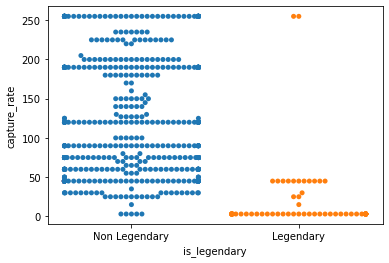

In [9]:
#From the above graph there are not trend from the amount of Legendary Pokemons per generation.
#Legendary Pokemons are hard to capture so lets see if it is true in the data as well.

numeric_capture = df['capture_rate']
#There is an error at position 773. It seems that I need to change that value to 225 inorder to tranform the column to numeric
print("Error causing when trying to covert values to numeric at index 773: ",end="")
print(numeric_capture[773])
numeric_capture[773] = 255
print("Set to 255 to numeric to work around the object to transform it: ", end="")
print(numeric_capture[773])
numeric_capture = pd.to_numeric(numeric_capture)
skr = sns.swarmplot(x= visual_legendary, y = numeric_capture)




# Visualization of Total stats on NonLegendary/Legendary

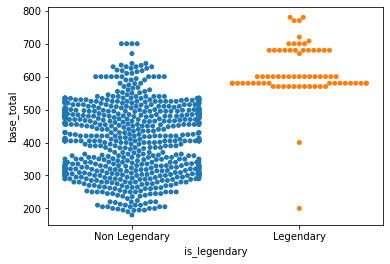

In [10]:
#From the graph we can understand that the capture_rate is a big factor to when it comes to Legendary Pokemon.
#We can also view that based on stats legendarys are far more stronger than normal pokemons. Based on the total stats of the pokemon

skr = sns.swarmplot(x= visual_legendary, y = df['base_total'])


# Visualization of percentage of male on NonLegendary/Legendary

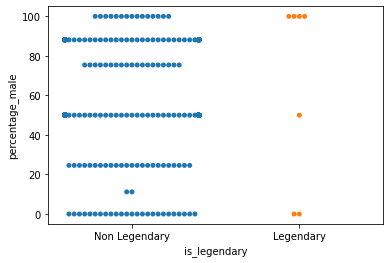

In [11]:
#Based on the graph we can see that based_total is one of the main features for the target is_legendary.
#Time to check if the sex matters to a legendary
skr = sns.swarmplot(x= visual_legendary, y = df['percentage_male'])

# Visualization of experience growth of NonLegendary/Legendary

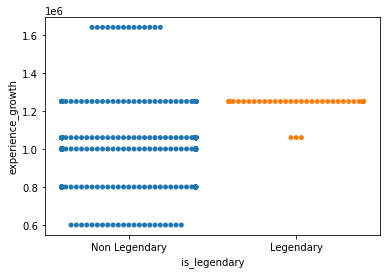

In [12]:
skr = sns.swarmplot(x= visual_legendary, y = df['experience_growth'])
#From this graph we can understand that Legendarys a high % of them have the same amount of experience grownth they can gain.
#This is can be added as a feature.

# Processing the data

In [13]:
#Most legendary pokemon do not have genders just a portion of them.
#Now Processing the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

# Feature selection

In [14]:
#Selecting the features of the dataset. Based on the previous graphs and some status that do matter in pokemon battles
#The stats will be of types, hp, attacks, speed and defensive statues.
X_features = ['capture_rate', 'percentage_male', 'type1', 'type2', 'height_m', 'weight_kg', 'experience_growth', 'hp', 'attack', 'base_total', 'defense', 'sp_attack', 'sp_defense', 'speed']
print(X_features)
pokemon = df[X_features]
X = pd.DataFrame(pokemon)
print(X.shape)

#Selecting the target is_Legendary
y = df.is_legendary
print(y.shape)

['capture_rate', 'percentage_male', 'type1', 'type2', 'height_m', 'weight_kg', 'experience_growth', 'hp', 'attack', 'base_total', 'defense', 'sp_attack', 'sp_defense', 'speed']
(801, 14)
(801,)


# Solution to missing values

capture_rate           0
percentage_male       98
type1                  0
type2                384
height_m              20
weight_kg             20
experience_growth      0
hp                     0
attack                 0
base_total             0
defense                0
sp_attack              0
sp_defense             0
speed                  0
dtype: int64

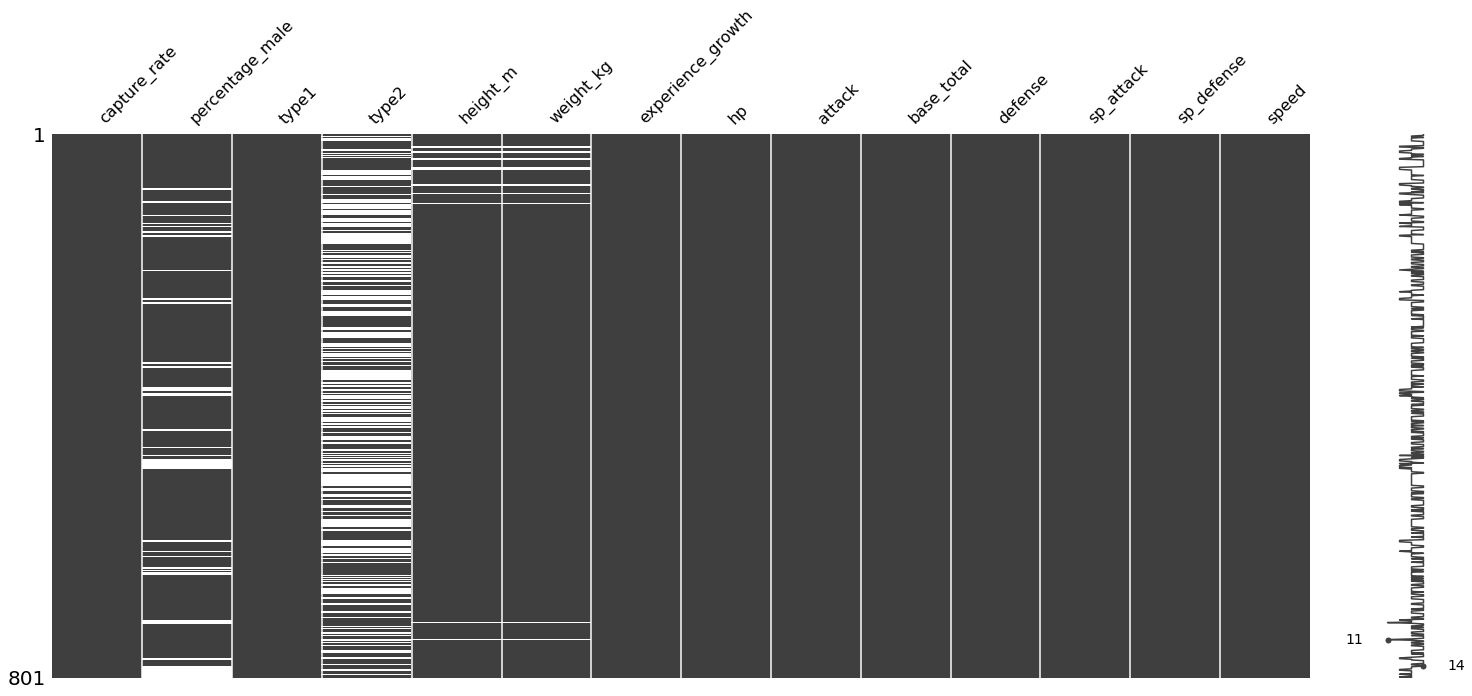

In [15]:
#Checking if there any missing values in the data of the features
display(X.isnull().sum())
display(msno.matrix(X)) 

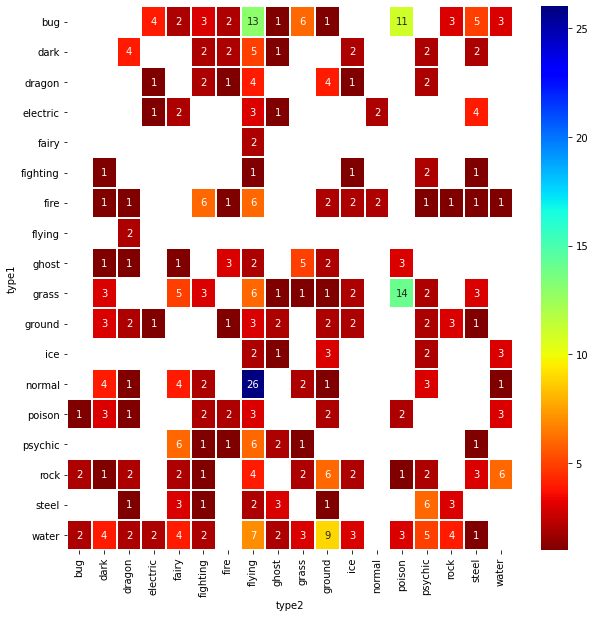

In [16]:
#Heatmap to support the reason why Type2 can not be dropped from the data.

plt.subplots(figsize=(10, 10))
sns.heatmap(
    df[df['type2'] != 'None'].groupby(['type1', 'type2']).size().unstack(),
    linewidths = 1,
    annot = True,
    cmap = "jet_r" 
)

plt.show()

In [17]:
#As it shows above "type2" is missing a lot of values. 
#But for the specific problem pokemon do tend to have either 1 or 2 types.
#So type 2 can not be dropped but repalcing missing values with None
X['type2'].fillna('None', inplace=True)
#print(X['type2'])

In [18]:
#Some pokemon do not have genders. There are some values missing for the % of a male : 98 in total.
#Checking the type if its numeric to replace them with a number (0) or if its an object with None
X['percentage_male'].dtypes #It is a float (numeric) so the approach of 0 to fill all the NaN values
X['percentage_male'].fillna(0, inplace=True)
#print(X['percentage_male'])

In [19]:
print(colored('Summarize of null values before modifications', 'cyan', attrs=['bold']))
print(X.isnull().sum()) #There are some missing values in height_m and weight_kg. Using SimpleImputer to fill the NaN with mean of the column

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy ='mean') #Ini of SimpleImputer
imputer.fit(X[['height_m', 'weight_kg']]) #Setting which columns need to be replaced of NaN with mean
X[['height_m', 'weight_kg']] = imputer.transform(X[['height_m', 'weight_kg']]) #Transforming NaN to mean of the columns
print(colored('Summarize of null values after modifications', 'cyan', attrs=['bold']))
print(X.isnull().sum())

Summarize of null values before modifications
capture_rate          0
percentage_male       0
type1                 0
type2                 0
height_m             20
weight_kg            20
experience_growth     0
hp                    0
attack                0
base_total            0
defense               0
sp_attack             0
sp_defense            0
speed                 0
dtype: int64
Summarize of null values after modifications
capture_rate         0
percentage_male      0
type1                0
type2                0
height_m             0
weight_kg            0
experience_growth    0
hp                   0
attack               0
base_total           0
defense              0
sp_attack            0
sp_defense           0
speed                0
dtype: int64


# Encoding categorical features

In [74]:
#Checking which columns are left to work around before training and testing the data.
#3 Category columns which will need to be encoded
print(colored('Object Columns:', 'cyan', attrs=['bold']))

for i in X.columns:
    if ( X[i].dtype == 'object'):
        print(i)
        
#Capture rate is already numeric itself so it will just need to change the type
X['capture_rate'] = X.capture_rate.astype(int)

#Encoding for all the categorical values
from sklearn.preprocessing import OrdinalEncoder
#Type1 Encoding to numeric values
enc = OrdinalEncoder(dtype=int)
enc.fit(X[['type1']])
enc.categories_
X['type1']=enc.transform(X[['type1']])


#Type2 Encoding to numeric values
enc = OrdinalEncoder(dtype=int)
enc.fit(X[['type2']])
enc.categories_
X['type2']=enc.transform(X[['type2']])

X.sample(8)

Object Columns:


capture_rate  percentage_male  type1  type2  height_m  weight_kg  \
175            75             88.1      4      8       0.6        3.2   
607            90             50.0      8      7       0.6       13.0   
403           120             50.0      3      0       0.9       30.5   
498            45             88.1      6      6       1.0       55.5   
678           180             50.0     16      9       0.8        2.0   
666           220             11.2      6     13       0.6       13.5   
316            75             50.0     13      0       1.7       80.0   
363           120             50.0     11     18       1.1       87.6   

     experience_growth   hp  attack  base_total  defense  sp_attack  \
175             800000   55      40         405       85         80   
607            1059860   60      40         370       60         95   
403            1059860   60      85         363       49         60   
498            1059860   90      93         418       55         70   
678            1000000   45      80         325      100         35   
666            1059860   62      50         369       58         73   
316            1640000  100      73         467       83         73   
363            1059860   90      60         410       70         75   

     sp_defense  speed  
175         105     40  
607          60     55  
403          49     60  
498          55     55  
678          37     28  
666          54     72  
316          83     55  
363          70     45

In [21]:
#Selecting the data to create the heatmap
mapdata = df[['capture_rate','percentage_male','type1','type2','height_m','weight_kg','experience_growth','hp','attack','base_total','defense','sp_attack','sp_defense','speed','is_legendary']]
test = df[['type1','type2']]

# Visualization the relationship between the variables choosen

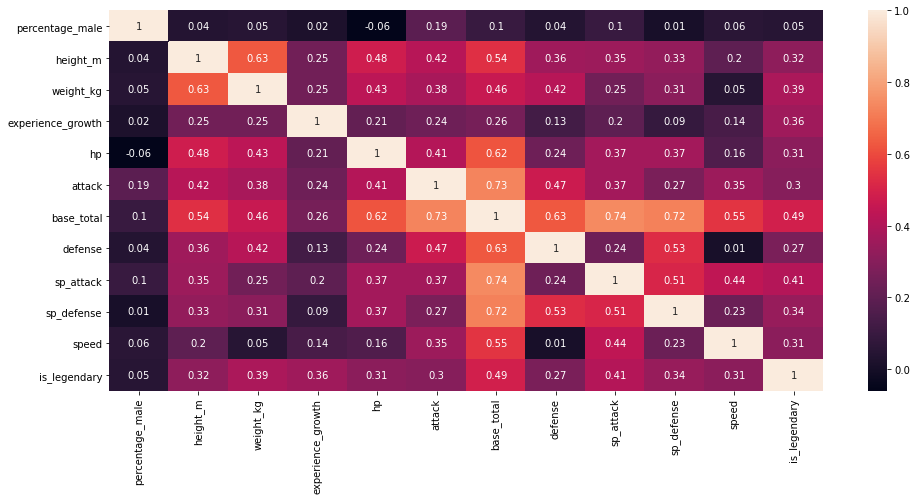

In [22]:
#Checking Correlation of the features
plt.figure(figsize=(16,7))
correlation_matrix = mapdata.corr().round(2)
sns.heatmap(data=correlation_matrix, annot = True)

# Applying PCA for visulisation of 2 components

In [23]:
#Applying Pca to reduce the dimension of the features
from sklearn.preprocessing import StandardScaler
sc_feature = StandardScaler()
X_PCA = sc_feature.fit_transform(X)

Explained Variance Ratio
[36.11  9.82  8.36  7.87  7.35  5.99  5.33  4.86  4.29  3.16  2.72  2.38
  1.77  0.  ]


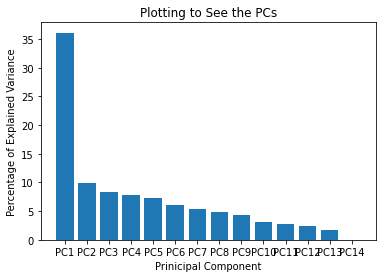

In [24]:
#Checking all variance ratio of each PCA. 14 in Total.
#Being able to visualize the features to explore the data 
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_PCA)

print(colored('Explained Variance Ratio', 'cyan', attrs=['bold']))
per_var = np.round(pca.explained_variance_ratio_*100, decimals =2)
print(per_var)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Prinicipal Component')
plt.title('Plotting to See the PCs')
plt.show()

In [25]:
#Creating the scatter plot for the 2 most signals out of the components
import plotly.express as px
pca = PCA(n_components=2)
components = pca.fit_transform(X_PCA)
fig = px.scatter(components, x=0, y=1, color=visual_legendary)
fig.show()

# Splitting and scaling the data

In [26]:
#Training data and Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 0)

In [27]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc_feature = StandardScaler()


X_train_scaled = sc_feature.fit_transform(X_train)
X_test_scaled = sc_feature.transform(X_test)


# Applying Logistic Regression model. With Scaled and non-Scaled data
# Comparing which one has the better accuracy score

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print(colored('Logistic Regression non-scaled data', 'cyan', attrs=['bold']))
#First model of Logistic Regression but with non scaled data.
model = LogisticRegression(max_iter=500)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')
print("Cross Val:","{:.3f}".format(scores.mean()))
model.fit(X_train,y_train)
print("Non scale predictions:",model.predict(X_test))
y_test_pred = model.predict(X_test)
print("Accuracy: ","{:.3f}".format(accuracy_score(y_test, y_test_pred)))

print(colored('================================================================', 'cyan', attrs=['bold']))

print(colored('Logistic Regression scaled data', 'cyan', attrs=['bold']))
#Second model of Logistic Regression but with scaled data.
model = LogisticRegression(max_iter=500)
scaled_scores = cross_val_score(model,X_train_scaled,y_train,cv=5,scoring='accuracy')
print("Cross Val:","{:.3f}".format(scores.mean()))
model.fit(X_train_scaled,y_train)
print("Scale predictions:",model.predict(X_test_scaled))
y_test_pred_scaled = model.predict(X_test_scaled)
print("Accuracy: ","{:.3f}".format(accuracy_score(y_test, y_test_pred_scaled)))
#Scaled model has a better accuracy score

Logistic Regression non-scaled data
Cross Val: 0.971
Non scale predictions: [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0]
Accuracy:  0.950
Logistic Regression scaled data
Cross Val: 0.971
Scale predictions: [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 

# Results of scaled Logistic Regression model

In [29]:
#Report of Logistic Regression.
from sklearn.metrics import classification_report
target_names = ["Non_Legendary","Legendary"]
cReportLog= classification_report(y_test,y_test_pred_scaled,target_names=target_names)
print(cReportLog)

               precision    recall  f1-score   support

Non_Legendary       0.97      1.00      0.98       216
    Legendary       0.95      0.72      0.82        25

     accuracy                           0.97       241
    macro avg       0.96      0.86      0.90       241
 weighted avg       0.97      0.97      0.96       241



# Calculating confusion matrix

In [30]:
table = pd.crosstab(y_test, y_test_pred_scaled, rownames =['Actual Legendary'], colnames = ['Predicted Legendary'])
table

Predicted Legendary    0   1
Actual Legendary            
0                    215   1
1                      7  18

In [31]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_test_pred_scaled)
cfm

array([[215,   1],
       [  7,  18]], dtype=int64)

In [32]:
#Manual Caclulation of Recall/Precision/Accuracy and F1 score from confusion matrix.
#Those results are for the class Non-Legendary.

recall = (215/(215+7))*100 #TP/(TP+FN)
precision = (215/(215+1))*100 #TP/(TP+FP)
accuracy = ((215+18)/(215+1+7+18))*100 #(TP+TN)/Total

print("Recall :","{:.2f}".format(round(recall)))
print("Precision: ","{:.2f}".format(round(precision)))
print("Model Accuracy: ","{:.2f}".format(round(accuracy)))
print("F-measure :","{:.2f}".format(round((2*recall*precision)/(recall+precision))))

Recall : 97.00
Precision:  100.00
Model Accuracy:  97.00
F-measure : 98.00


# Applying KNN classier. Will compare at the end which one has the best score

In [33]:
#Applying K-nearest neigbors alorithm for scaled data
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train_scaled, y_train)
y_test_pred_scaled = model.predict(X_test_scaled)
print("Accuracy of KNN","{:.3f}".format(accuracy_score(y_test, y_test_pred_scaled)))
#The accuracy of KNN model seems to be higher than the one from scaled Logistic Regression :0.967 vs 0.971

Accuracy of KNN 0.971


In [34]:
#Cross validation on X_train_scaled & y_train.
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train_scaled, y_train)
score = cross_val_score(model,X_train_scaled,y_train,cv=5,scoring='accuracy')
print("Cross Validation score: ""{:.2f}".format(score.mean()))
model.predict(X_test_scaled)
from sklearn.metrics import f1_score
#Predict the X_test_scaled on KNN model.
print("Test score of KNN: ""{:.2f}".format(accuracy_score(y_test,y_test_pred_scaled)))

Cross Validation score: 0.97
Test score of KNN: 0.97


# Report of KNN model

In [35]:
#Report Results of KNN algorithm
target_names = ["Non_Legendary","Legendary"]
cReport= classification_report(y_test,y_test_pred_scaled,target_names=target_names)
print(cReport)

               precision    recall  f1-score   support

Non_Legendary       0.97      1.00      0.98       216
    Legendary       0.95      0.76      0.84        25

     accuracy                           0.97       241
    macro avg       0.96      0.88      0.91       241
 weighted avg       0.97      0.97      0.97       241



In [36]:
print(colored('Logistic Regression Report', 'cyan', attrs=['bold']))
print(cReportLog)
print("=======================================================")
print(colored('KNN Report', 'cyan', attrs=['bold']))
print(cReport)

Logistic Regression Report
               precision    recall  f1-score   support

Non_Legendary       0.97      1.00      0.98       216
    Legendary       0.95      0.72      0.82        25

     accuracy                           0.97       241
    macro avg       0.96      0.86      0.90       241
 weighted avg       0.97      0.97      0.96       241

KNN Report
               precision    recall  f1-score   support

Non_Legendary       0.97      1.00      0.98       216
    Legendary       0.95      0.76      0.84        25

     accuracy                           0.97       241
    macro avg       0.96      0.88      0.91       241
 weighted avg       0.97      0.97      0.97       241



##### Due to not any difference in accuracy while comparing the 2 models the score will be based on F1 (Details in the report)

# Trying to find the best n for nearest neighbors for the model

In [37]:
#Setting the range of neigbhors that will checked
#Storing all the scores in a list
n_range = range(1,51)
n_scores = []

for i in n_range:
    model = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(model, X, y, cv=5,scoring='f1')
    n_scores.append(score.mean())
print(n_scores)
#Getting the best score out of the list of neighbors
print("The best number to set for the n_neigbors is: ",n_scores.index(max(n_scores))+1)


[0.9182316534040671, 0.8649629629629629, 0.8497142857142856, 0.8237720797720798, 0.8047102322964392, 0.8340468706920319, 0.7912076429317809, 0.8077494982667396, 0.8081841777058685, 0.7881871640492331, 0.8171619259494678, 0.7762495568947182, 0.8057005137984004, 0.7839657232315742, 0.7828126489750517, 0.8026849350542342, 0.7919746220079924, 0.7830578361612844, 0.8168356374807988, 0.8078409284860898, 0.8168356374807988, 0.8078409284860898, 0.8114169182689761, 0.8128983997504576, 0.8121044546850997, 0.805358914146456, 0.8189827615634068, 0.8099880525686978, 0.822625963004161, 0.8062743707904998, 0.8169808017138385, 0.8053603922958761, 0.8090035937366304, 0.7981023277797471, 0.7889356611130804, 0.7855497054340214, 0.774279569892473, 0.7544444283932604, 0.7645899630829747, 0.7638467504598954, 0.7585557451688902, 0.7742759389536001, 0.7638467504598954, 0.7499259361328328, 0.734321540528437, 0.7066601648670614, 0.7069360269360269, 0.6889186176142698, 0.7005128205128204, 0.7019943019943019]
The

# Visualization of the range of 1 to 50 Number of nearest neighbors vs Cross validation accuracy score

<function matplotlib.pyplot.show(*args, **kw)>

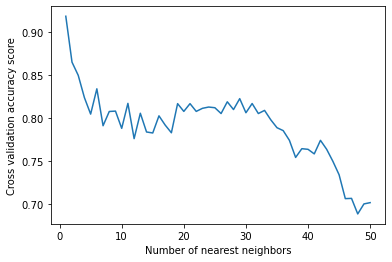

In [38]:
#Plotting the number of nearest neighbors vs the cross validation accuracy score
plt.plot(n_range,n_scores)
plt.ylabel("Cross validation accuracy score")
plt.xlabel("Number of nearest neighbors")
plt.show

In [39]:
#Based on the plot and the previous method applied the best number of n_neibhors is 1
model = KNeighborsClassifier(n_neighbors=1)
score = cross_val_score(model, X, y, cv=5,scoring='f1')
print("Best Score cross validation: {:.3f}".format(score.mean()))

Best Score cross validation: 0.918


# Hyperparameter tuning with Grid Search

In [40]:
#Setting the range of n nearest neighbors
n_range = list(range(1,51))
para_grid = dict(n_neighbors=n_range)
print(para_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]}


In [41]:
#Finding out the best possible number of n nearest neigbors to set for the model with GridSearch
model = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, para_grid, cv=5, scoring="f1", return_train_score=False)
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='f1')

In [42]:
#Displaying all the mean test scores with params we can see which has the best mean_test_score
#But is not as efficient as visualisation of the results.
pd.DataFrame(grid.cv_results_)[["mean_test_score", "params"]]

mean_test_score               params
0          0.821988   {'n_neighbors': 1}
1          0.780261   {'n_neighbors': 2}
2          0.851754   {'n_neighbors': 3}
3          0.833039   {'n_neighbors': 4}
4          0.898908   {'n_neighbors': 5}
5          0.868333   {'n_neighbors': 6}
6          0.877855   {'n_neighbors': 7}
7          0.820146   {'n_neighbors': 8}
8          0.874620   {'n_neighbors': 9}
9          0.832368  {'n_neighbors': 10}
10         0.873839  {'n_neighbors': 11}
11         0.880261  {'n_neighbors': 12}
12         0.895604  {'n_neighbors': 13}
13         0.821648  {'n_neighbors': 14}
14         0.842368  {'n_neighbors': 15}
15         0.821648  {'n_neighbors': 16}
16         0.813461  {'n_neighbors': 17}
17         0.817563  {'n_neighbors': 18}
18         0.808413  {'n_neighbors': 19}
19         0.765640  {'n_neighbors': 20}
20         0.765640  {'n_neighbors': 21}
21         0.727563  {'n_neighbors': 22}
22         0.750640  {'n_neighbors': 23}
23         0.659267  {'n_neighbors': 24}
24         0.718791  {'n_neighbors': 25}
25         0.659267  {'n_neighbors': 26}
26         0.699011  {'n_neighbors': 27}
27         0.595804  {'n_neighbors': 28}
28         0.623077  {'n_neighbors': 29}
29         0.572727  {'n_neighbors': 30}
30         0.572727  {'n_neighbors': 31}
31         0.530969  {'n_neighbors': 32}
32         0.550749  {'n_neighbors': 33}
33         0.485548  {'n_neighbors': 34}
34         0.485548  {'n_neighbors': 35}
35         0.362471  {'n_neighbors': 36}
36         0.362471  {'n_neighbors': 37}
37         0.362471  {'n_neighbors': 38}
38         0.362471  {'n_neighbors': 39}
39         0.332168  {'n_neighbors': 40}
40         0.332168  {'n_neighbors': 41}
41         0.281818  {'n_neighbors': 42}
42         0.281818  {'n_neighbors': 43}
43         0.285455  {'n_neighbors': 44}
44         0.285455  {'n_neighbors': 45}
45         0.285455  {'n_neighbors': 46}
46         0.285455  {'n_neighbors': 47}
47         0.285455  {'n_neighbors': 48}
48         0.285455  {'n_neighbors': 49}
49         0.220000  {'n_neighbors': 50}

<function matplotlib.pyplot.show(*args, **kw)>

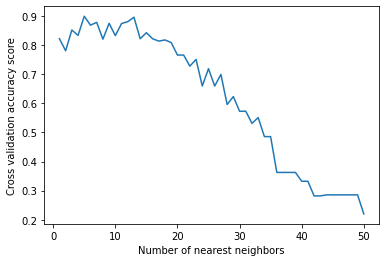

In [43]:
#Visualization of the best scores from GridSearch
plt.plot(n_range,grid.cv_results_['mean_test_score'])
plt.ylabel("Cross validation accuracy score")
plt.xlabel("Number of nearest neighbors")
plt.show

In [44]:
#From the plot and the best score function and best params function it shows that the best number of n nearest neighbors is 1
print("Best Score KNN Tuning with just n_neighbors: ""{:.2f}".format(grid.best_score_))
print("Best fit for number of nearest neighbors and weight:",grid.best_params_)

Best Score KNN Tuning with just n_neighbors: 0.90
Best fit for number of nearest neighbors and weight: {'n_neighbors': 5}


# Hyperparameter tuning with Grid Search with weights

In [45]:
#Initializing the variables that will be passed to the model
model = KNeighborsClassifier()
#Initializing the parameters
n_range = list(range(1,51))
w_range = ['uniform','distance']
para_grid = dict(n_neighbors=n_range,weights=w_range)
#Displaying the parameters grid
print(para_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['uniform', 'distance']}


In [46]:
#Applying GridSearchCrossValidation based on f1 score to find best score
grid = GridSearchCV(model, para_grid, cv=5, scoring="f1", return_train_score=False)
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [47]:
#Because using weights doubles the data due to uniform and distance weight for the same number of n_neigbors
#A seperation of those is needed in order to visualise the results
gs = pd.DataFrame(grid.cv_results_)[["mean_test_score","params"]]

#Getting the number of n neighbors
gs['neighbors'] = gs['params'].apply(lambda x: x['n_neighbors'])

#Getting all the weights
gs['weights'] = gs['params'].apply(lambda x: x['weights'])
#Storing to uniform var only the 'uniform' type of weight
uniform = gs[gs['weights'] == 'uniform']
#Storing to dist var only the 'distance' type of weight
dist = gs[gs['weights'] == 'distance']

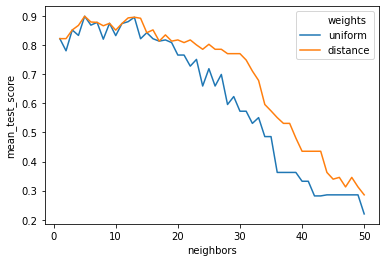

In [48]:
#Plotting the best scores for both hyperparameters
sns.lineplot(x='neighbors', y='mean_test_score', data=gs, hue='weights')

In [49]:
#As from the plot and the function below the best option to use in the model is 5 as n_neigbhors and 'uniform' as the weight
print("Best Score:""{:.3f}" .format(grid.best_score_))
print(grid.best_params_)

Best Score:0.899
{'n_neighbors': 5, 'weights': 'uniform'}


# Hyperparameter tuning with Random Search

In [50]:
#Initializing all the parameters needed for the method of Hyperparameter tuning
n_range = list(range(1,51))
w_range = ['uniform','distance']
para_rand = dict(n_neighbors=n_range, weights = w_range)
print(para_rand)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['uniform', 'distance']}


In [51]:
#Applying RandomSearch for 10 different number of neighbors
model = KNeighborsClassifier()
from sklearn.model_selection import RandomizedSearchCV
rand = RandomizedSearchCV(model,para_rand,cv=5,scoring='f1',n_iter=10, random_state=5, return_train_score=False)
rand.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...],
                                        'weights': ['uniform', 'distance']},
                   random_state=5, scoring='f1')

In [52]:
pd.DataFrame(rand.cv_results_)[['mean_test_score','params']]

mean_test_score                                      params
0         0.485548   {'weights': 'uniform', 'n_neighbors': 34}
1         0.813461   {'weights': 'uniform', 'n_neighbors': 17}
2         0.659267   {'weights': 'uniform', 'n_neighbors': 24}
3         0.842368   {'weights': 'uniform', 'n_neighbors': 15}
4         0.362471   {'weights': 'uniform', 'n_neighbors': 38}
5         0.893265  {'weights': 'distance', 'n_neighbors': 12}
6         0.868333    {'weights': 'uniform', 'n_neighbors': 6}
7         0.873839   {'weights': 'uniform', 'n_neighbors': 11}
8         0.874620   {'weights': 'distance', 'n_neighbors': 9}
9         0.834883  {'weights': 'distance', 'n_neighbors': 18}

In [53]:
#From the random search the best number of neighbors is 12 with weight of distance
print(rand.best_score_)
print(rand.best_params_)

0.893264533883729
{'weights': 'distance', 'n_neighbors': 12}


# Hyperparameter tuning with RandomSearch but with 15 itterations

In [54]:
#Finding the best score out of each 1 iteration from RandomSearch
model = KNeighborsClassifier()
best_scores = []
n_range = list(range(1,51))
w_range = ['uniform','distance']
para_rand = dict(n_neighbors=n_range, weights = w_range)
for i in range(15):
    rand = RandomizedSearchCV(model,para_rand,cv=5,scoring='f1',n_iter=10, random_state=10, return_train_score=False)
    rand.fit(X_train_scaled,y_train)
    best_scores.append(round(rand.best_score_,3))
pd.DataFrame(data=best_scores,columns=['best_score'])

best_score
0        0.851
1        0.851
2        0.851
3        0.851
4        0.851
5        0.851
6        0.851
7        0.851
8        0.851
9        0.851
10       0.851
11       0.851
12       0.851
13       0.851
14       0.851

# Comparing non-Hyperparemeter KNN vs Hyperparameter KNN

In [55]:
#Inizializing the model for the first version of the non-tunned KNN model
model = KNeighborsClassifier(n_neighbors=2)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv = 5, scoring='f1')
print("Cross Val of non-tunned KNN:""{:.2f}".format(np.mean(cv_scores)))

#Grind Search for KNN
model = KNeighborsClassifier()
n_range= list(range(1,51))
w_range = ['uniform','distance']
gs_params_dict = dict(n_neighbors=n_range,weights=w_range)
gs = GridSearchCV(model, gs_params_dict, scoring='f1')
gs.fit(X_train_scaled,y_train)
#Comparing CV vs GridSearch
print("Best score of GridSearch:""{:.2f}".format(gs.best_score_))

#Prediction for the X_test on KNN model
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train_scaled, y_train)
y_pred_knn = model.predict(X_test_scaled)
print("Test score of non-tunned KNN:""{:.2f}".format(f1_score(y_test, y_pred_knn)))


#Prediction for the X_test on tuned KNN model
y_pred_tuned = gs.best_estimator_.predict(X_test_scaled)
print("Test score of tuned KNN:""{:.2f}".format(f1_score(y_test, y_pred_tuned)))

#There is an increase of performance in with the Hyperparameter KNN model
#The grid search found the best parameters for the training data
#But it didnt generalize well to the testng.
#Due of it doing better on the training set than te testing set there is overfitting.

Cross Val of non-tunned KNN:0.78
Best score of GridSearch:0.90
Test score of non-tunned KNN:0.84
Test score of tuned KNN:0.84


# Exploring the values that are causing overfitting in test data

In [56]:
#We can check how many values in the data that are casuing this problem
(y_test_pred_scaled != y_test).sum()
#Seven in total

7

In [57]:
#Exploring which indexes of Pokemon in the test data are causing over fitting
y_test_pred_scaled != y_test

8      False
253    False
85     False
406    False
14     False
439    False
706    False
454    False
718    False
522    False
79     False
103    False
402    False
476    False
175    False
27     False
344    False
150    False
200    False
420    False
250    False
285    False
390    False
241    False
636    False
270    False
732    False
477    False
759    False
630    False
702     True
55     False
648    False
239    False
531    False
162    False
31     False
278    False
266    False
670    False
797     True
548    False
580    False
40     False
726    False
242    False
708    False
623    False
689    False
441    False
428    False
772    False
310    False
401    False
235    False
571    False
616    False
243    False
688    False
520    False
145    False
231    False
467    False
567    False
425    False
267    False
521    False
255    False
302    False
678    False
75     False
650    False
742    False
279    False
1      False
385    False
500    False

### Data Values in test causing overfitting

| Index | Value |
| --- | --- | 
| 648 | TRUE |
| 797 | TRUE |
| 772 | TRUE |
| 794 | TRUE |
| 793 | TRUE |
| 641 | TRUE |
| 380 | TRUE |

# UnderSampling

In [58]:
#Storing the features and the target needed to a new DataFrame
columns_under_samples = ['capture_rate', 'percentage_male', 'type1', 'type2', 'height_m', 'weight_kg', 'experience_growth', 'hp', 'attack', 'base_total', 'defense', 'sp_attack', 'sp_defense', 'speed','is_legendary']
covertor = df[columns_under_samples]
df_undersample = pd.DataFrame(covertor)

In [59]:
#Due to over fitting the approach of undersampling from the majority class will be applied

#Storing the lenght of the minority class ( non-legendary )
minority_pokemon_len = len(df_undersample[df_undersample['is_legendary']== 1])
print("Total of legendary:", minority_pokemon_len)

#Storing the lenght of the majority class ( Legendary )
majority_pokemon_len = len(df_undersample[df_undersample['is_legendary']== 0])
print("Total of non-Legendary:", majority_pokemon_len)


#Getting the indeces from the majority class
majority_pokemon_indices = df_undersample[df_undersample['is_legendary']== 0].index
print(majority_pokemon_indices)

Total of legendary: 70
Total of non-Legendary: 731
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            774, 775, 776, 777, 778, 779, 780, 781, 782, 783],
           dtype='int64', length=731)


In [60]:
#Getting random samples from the majority class based on the lenght of the minority class
np.random.seed(600) #For report/project puproses seed is needed to have same values each Kernel run.
random_majority_indices = np.random.choice(majority_pokemon_indices, minority_pokemon_len, replace=False)


print(len(random_majority_indices))


70


In [61]:
#Getting the indeces from the minority class
manority_pokemon_indices = df_undersample[df_undersample['is_legendary']== 1].index
print(manority_pokemon_indices)

Int64Index([143, 144, 145, 149, 150, 242, 243, 244, 248, 249, 250, 376, 377,
            378, 379, 380, 381, 382, 383, 384, 385, 479, 480, 481, 482, 483,
            484, 485, 486, 487, 489, 490, 491, 492, 493, 637, 638, 639, 640,
            641, 642, 643, 644, 645, 646, 647, 648, 715, 716, 717, 718, 719,
            720, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795,
            796, 797, 798, 799, 800],
           dtype='int64')


In [62]:
#Joining the arrays of minority and the random samples from the majority class
under_sample_indices = np.concatenate([manority_pokemon_indices, random_majority_indices])

In [63]:
under_sample = df_undersample.loc[under_sample_indices]

# Now the data is balanced.

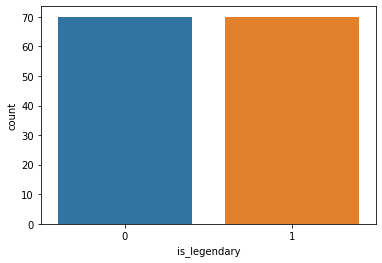

In [64]:
sns.countplot(x=under_sample['is_legendary'], data=under_sample)

#### Due to the new dataframe pre processing will be applied.

In [65]:
under_sample.sample(5)

capture_rate  percentage_male   type1   type2  height_m  weight_kg  \
408           45             88.1    rock     NaN       1.6      102.5   
630           90             50.0    fire     NaN       1.4       58.0   
661          120             50.0    fire  flying       0.7       16.0   
423           45             50.0  normal     NaN       1.2       20.3   
680           45             50.0   steel   ghost       1.7       53.0   

     experience_growth  hp  attack  base_total  defense  sp_attack  \
408             600000  97     165         495       60         65   
630            1000000  85      97         484       66        105   
661            1059860  62      73         382       55         56   
423             800000  75     100         482       66         60   
680            1000000  60     150         520       50        150   

     sp_defense  speed  is_legendary  
408          50     58             0  
630          66     65             0  
661          52     84             0  
423          66    115             0  
680          50     60             0

In [66]:
X_undersample = under_sample.loc[:, df_undersample.columns!='is_legendary']
y_undersample = under_sample.is_legendary

print(X_undersample.shape)
print(y_undersample.shape)

(140, 14)
(140,)


#### Dealing with NaN values

In [67]:
X_undersample['type2'].fillna('None', inplace=True)

X_undersample['percentage_male'].dtypes #It is a float (numeric) so the approach of 0 to fill all the NaN values
X_undersample['percentage_male'].fillna(0, inplace=True)
imputer = SimpleImputer(missing_values=np.nan, strategy ='mean')
imputer.fit(X_undersample[['height_m', 'weight_kg']])
X_undersample[['height_m', 'weight_kg']] = imputer.transform(X_undersample[['height_m', 'weight_kg']])

#### Encoding categorical features

In [68]:
#Capture rate is already numeric itself so it will just need to change the type
X_undersample['capture_rate'] = X_undersample.capture_rate.astype(int)

#Encoding for all the categorical values

#Type1 Encoding to numeric values
enc = OrdinalEncoder(dtype=int)
enc.fit(X_undersample[['type1']])
enc.categories_
X_undersample['type1']=enc.transform(X_undersample[['type1']])


#Type2 Encoding to numeric values
enc = OrdinalEncoder(dtype=int)
enc.fit(X_undersample[['type2']])
enc.categories_
X_undersample['type2']=enc.transform(X_undersample[['type2']])

X_undersample.head(8)

capture_rate  percentage_male  type1  type2  height_m  weight_kg  \
143             3              0.0     11      7       1.7       55.4   
144             3              0.0      3      7       1.6       52.6   
145             3              0.0      6      7       2.0       60.0   
149             3              0.0     14      0       2.0      122.0   
150            45              0.0     14      0       0.4        4.0   
242             3              0.0      3      0       1.9      178.0   
243             3              0.0      6      0       2.1      198.0   
244             3              0.0     17      0       2.0      187.0   

     experience_growth   hp  attack  base_total  defense  sp_attack  \
143            1250000   90      85         580      100         95   
144            1250000   90      90         580       85        125   
145            1250000   90     100         580       90        125   
149            1250000  106     150         780       70        194   
150            1059860  100     100         600      100        100   
242            1250000   90      85         580       75        115   
243            1250000  115     115         580       85         90   
244            1250000  100      75         580      115         90   

     sp_defense  speed  
143         125     85  
144          90    100  
145          85     90  
149         120    140  
150         100    100  
242         100    115  
243          75    100  
244         115     85

In [69]:
X_undersample.dtypes

capture_rate           int32
percentage_male      float64
type1                  int32
type2                  int32
height_m             float64
weight_kg            float64
experience_growth      int64
hp                     int64
attack                 int64
base_total             int64
defense                int64
sp_attack              int64
sp_defense             int64
speed                  int64
dtype: object

#### Splitting the data

In [70]:
#Training data and Testing data
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state= 0)


#scaling data
sc_feature = StandardScaler()


X_train_scaled = sc_feature.fit_transform(X_train)
X_test_scaled = sc_feature.transform(X_test)

In [71]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(98, 14)
(98,)
(42, 14)
(42,)


#### Applying KNN which was the best model with the parameters from hyperparameter tunning

In [72]:
model_under_sample = KNeighborsClassifier(n_neighbors=5, weights = 'uniform')
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv = 5, scoring='f1')
print("Cross Val of balanced tunned KNN:""{:.2f}".format(np.mean(cv_scores)))
      
      
model_under_sample = KNeighborsClassifier(n_neighbors=5, weights = 'uniform')
model_under_sample.fit(X_train_scaled, y_train)
y_test_pred = model_under_sample.predict(X_test_scaled)
print("Test score of balanced tunned KNN:""{:.2f}".format(f1_score(y_test, y_test_pred)))

Cross Val of balanced tunned KNN:0.96
Test score of balanced tunned KNN:0.98
